In [19]:
!pip install nltk
!pip install textblob
!pip install wordcloud
!pip install tweepy

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
data = pd.read_csv("email_headers.csv")
headers = pd.DataFrame(data)
headers

,From,To,Date,Subject
0,Sven.Flecha@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",01-06-2014 08:39,GT-SeismicProcessorPro Bug Report
1,Kanon.Herrero@gastech.com.kronos,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",01-06-2014 08:58,Inspection request for site
2,Bertrand.Ovan@gastech.com.kronos,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",01-06-2014 09:28,New refueling policies - Effective February 1
3,Valeria.Morlun@gastech.com.kronos,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",01-06-2014 09:38,Route suggestion for next shift
4,Mat.Bramar@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",01-06-2014 09:49,Upcoming birthdays
...,...,...,...,...
1165,Mat.Bramar@gastech.com.kronos,"Mat.Bramar@gastech.com.kronos, Anda.Ribera@gas...",1/17/2014 19:47,RE: Training opportunity
1166,Sven.Flecha@gastech.com.kronos,"Nils.Calixto@gastech.com.kronos, Sven.Flecha@g...",1/17/2014 19:56,RE: The most creative spam I've seen lately.
1167,Dylan.Scozzese@gastech.com.kronos,"Albina.Hafon@gastech.com.kronos, Valeria.Morlu...",1/17/2014 20:04,RE: Traffic advisory for today
1168,Varja.Lagos@gastech.com.kronos,"Hideki.Cocinaro@gastech.com.kronos, Varja.Lago...",1/17/2014 20:15,RE: Inspection request for site


In [5]:
def cleantext(headers):
    headers = re.sub(r'RE:', "", headers)
    return headers

headers['Subject'] = headers['Subject'].apply(cleantext)
headers

,From,To,Date,Subject
0,Sven.Flecha@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",01-06-2014 08:39,GT-SeismicProcessorPro Bug Report
1,Kanon.Herrero@gastech.com.kronos,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",01-06-2014 08:58,Inspection request for site
2,Bertrand.Ovan@gastech.com.kronos,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",01-06-2014 09:28,New refueling policies - Effective February 1
3,Valeria.Morlun@gastech.com.kronos,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",01-06-2014 09:38,Route suggestion for next shift
4,Mat.Bramar@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",01-06-2014 09:49,Upcoming birthdays
...,...,...,...,...
1165,Mat.Bramar@gastech.com.kronos,"Mat.Bramar@gastech.com.kronos, Anda.Ribera@gas...",1/17/2014 19:47,Training opportunity
1166,Sven.Flecha@gastech.com.kronos,"Nils.Calixto@gastech.com.kronos, Sven.Flecha@g...",1/17/2014 19:56,The most creative spam I've seen lately.
1167,Dylan.Scozzese@gastech.com.kronos,"Albina.Hafon@gastech.com.kronos, Valeria.Morlu...",1/17/2014 20:04,Traffic advisory for today
1168,Varja.Lagos@gastech.com.kronos,"Hideki.Cocinaro@gastech.com.kronos, Varja.Lago...",1/17/2014 20:15,Inspection request for site


In [16]:
del headers['Unnamed: 0']
headers.to_csv('new_emails_again.csv', index = False)

,From,To,Date,Subject
0,Sven.Flecha@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",01-06-2014 08:39,GT-SeismicProcessorPro Bug Report
1,Kanon.Herrero@gastech.com.kronos,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",01-06-2014 08:58,Inspection request for site
2,Bertrand.Ovan@gastech.com.kronos,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",01-06-2014 09:28,New refueling policies - Effective February 1
3,Valeria.Morlun@gastech.com.kronos,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",01-06-2014 09:38,Route suggestion for next shift
4,Mat.Bramar@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",01-06-2014 09:49,Upcoming birthdays
...,...,...,...,...
1165,Mat.Bramar@gastech.com.kronos,"Mat.Bramar@gastech.com.kronos, Anda.Ribera@gas...",1/17/2014 19:47,Training opportunity
1166,Sven.Flecha@gastech.com.kronos,"Nils.Calixto@gastech.com.kronos, Sven.Flecha@g...",1/17/2014 19:56,The most creative spam I've seen lately.
1167,Dylan.Scozzese@gastech.com.kronos,"Albina.Hafon@gastech.com.kronos, Valeria.Morlu...",1/17/2014 20:04,Traffic advisory for today
1168,Varja.Lagos@gastech.com.kronos,"Hideki.Cocinaro@gastech.com.kronos, Varja.Lago...",1/17/2014 20:15,Inspection request for site


In [23]:
def getSubjectivity(text):
    TextBlob(text).sentiment.subjectivity
    
def getPolarity(text):
    TextBlob(text).sentiment.polarity
    
headers['Subjectivity'] = headers['Subject'].apply(getSubjectivity)
headers['Polarity'] = headers['Subject'].apply(getPolarity)

headers['Subject']    

0                   GT-SeismicProcessorPro Bug Report
1                         Inspection request for site
2       New refueling policies - Effective February 1
3                     Route suggestion for next shift
4                                  Upcoming birthdays
                            ...                      
1165                             Training opportunity
1166         The most creative spam I've seen lately.
1167                       Traffic advisory for today
1168                      Inspection request for site
1169                       Traffic advisory for today
Name: Subject, Length: 1170, dtype: object

In [24]:
#TextBlob(new['subject'][0]).sentiment.polarity
for i in range(len(headers['Subject'])):
    headers['Subjectivity'][i] = TextBlob(headers['Subject'][i]).sentiment.subjectivity
    headers['Polarity'][i] = TextBlob(headers['Subject'][i]).sentiment.polarity
headers    

,Subject,Subjectivity,Polarity
0,GT-SeismicProcessorPro Bug Report,0.0,0.0
1,Inspection request for site,0.0,0.0
2,New refueling policies - Effective February 1,0.627273,0.368182
3,Route suggestion for next shift,0.0,0.0
4,Upcoming birthdays,0.0,0.0
...,...,...,...
1165,Training opportunity,0.0,0.0
1166,The most creative spam I've seen lately.,0.7,0.233333
1167,Traffic advisory for today,0.0,0.0
1168,Inspection request for site,0.0,0.0


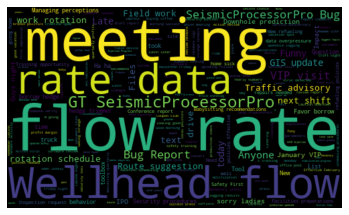

In [25]:
allWords = ' '.join([word for word in headers['Subject']] )
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow( wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [29]:
data = pd.read_csv("one_on_one.csv")
headers = pd.DataFrame(data)
new = pd.DataFrame(data)
new['subject'] = new['subject'].apply(cleantext)
#new

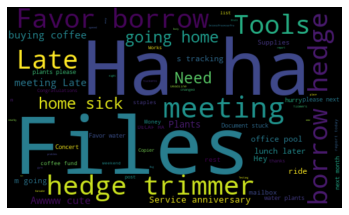

In [30]:
allWords = ' '.join([word for word in new['subject']] )
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow( wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [31]:
new['Subjectivity'] = new['subject'].apply(getSubjectivity)
new['Polarity'] = new['subject'].apply(getPolarity)

for i in range(len(new['subject'])):
    new['Subjectivity'][i] = TextBlob(new['subject'][i]).sentiment.subjectivity
    new['Polarity'][i] = TextBlob(new['subject'][i]).sentiment.polarity
new   

,from,to,date,subject,Subjectivity,Polarity
0,Sven.Flecha@gastech.com.kronos,Isak.Baza@gastech.com.kronos,01-06-2014 08:39,GT-SeismicProcessorPro Bug Report,0.0,0.0
1,Orhan.Strum@gastech.com.kronos,Stenig.Fusil@gastech.com.kronos,01-06-2014 10:25,Service anniversary,0.0,0.0
2,Loreto.Bodrogi@gastech.com.kronos,Ingrid.Barranco@gastech.com.kronos,01-06-2014 11:04,Plants,0.0,0.0
3,Ingrid.Barranco@gastech.com.kronos,Loreto.Bodrogi@gastech.com.kronos,01-06-2014 12:15,Plants,0.0,0.0
4,Stenig.Fusil@gastech.com.kronos,Orhan.Strum@gastech.com.kronos,01-06-2014 12:28,Service anniversary,0.0,0.0
...,...,...,...,...,...,...
247,Edvard.Vann@gastech.com.kronos,Henk.Mies@gastech.com.kronos,1/17/2014 15:03,Out of staples,0.0,0.0
248,Willem.Vasco-Pais@gastech.com.kronos,Orhan.Strum@gastech.com.kronos,1/17/2014 16:05,Favor - water plants please next month,0.0,0.0
249,Henk.Mies@gastech.com.kronos,Edvard.Vann@gastech.com.kronos,1/17/2014 16:17,Out of staples,0.0,0.0
250,Orhan.Strum@gastech.com.kronos,Willem.Vasco-Pais@gastech.com.kronos,1/17/2014 17:04,Favor - water plants please next month,0.0,0.0


In [32]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score >0 :
        return 'Positive'
    else :
        return 'Neutral'

headers['Analysis'] = headers['Polarity'].apply(getAnalysis)
headers
    
new['Analysis'] = new['Polarity'].apply(getAnalysis)
new

,from,to,date,subject,Subjectivity,Polarity,Analysis
0,Sven.Flecha@gastech.com.kronos,Isak.Baza@gastech.com.kronos,01-06-2014 08:39,GT-SeismicProcessorPro Bug Report,0.0,0.0,Neutral
1,Orhan.Strum@gastech.com.kronos,Stenig.Fusil@gastech.com.kronos,01-06-2014 10:25,Service anniversary,0.0,0.0,Neutral
2,Loreto.Bodrogi@gastech.com.kronos,Ingrid.Barranco@gastech.com.kronos,01-06-2014 11:04,Plants,0.0,0.0,Neutral
3,Ingrid.Barranco@gastech.com.kronos,Loreto.Bodrogi@gastech.com.kronos,01-06-2014 12:15,Plants,0.0,0.0,Neutral
4,Stenig.Fusil@gastech.com.kronos,Orhan.Strum@gastech.com.kronos,01-06-2014 12:28,Service anniversary,0.0,0.0,Neutral
...,...,...,...,...,...,...,...
247,Edvard.Vann@gastech.com.kronos,Henk.Mies@gastech.com.kronos,1/17/2014 15:03,Out of staples,0.0,0.0,Neutral
248,Willem.Vasco-Pais@gastech.com.kronos,Orhan.Strum@gastech.com.kronos,1/17/2014 16:05,Favor - water plants please next month,0.0,0.0,Neutral
249,Henk.Mies@gastech.com.kronos,Edvard.Vann@gastech.com.kronos,1/17/2014 16:17,Out of staples,0.0,0.0,Neutral
250,Orhan.Strum@gastech.com.kronos,Willem.Vasco-Pais@gastech.com.kronos,1/17/2014 17:04,Favor - water plants please next month,0.0,0.0,Neutral


In [33]:
headers['Analysis'].value_counts()

Neutral     194
Negative     40
Positive     18
Name: Analysis, dtype: int64

In [34]:
#for i in range( len(headers['Analysis'])):
#    if headers['Analysis'][i] == 'Negative':
df = headers[headers['Analysis'] == 'Negative']
df        
        


,from,to,date,subject,Subjectivity,Polarity,Analysis
17,Kanon.Herrero@gastech.com.kronos,Nils.Calixto@gastech.com.kronos,01-06-2014 15:05,Late for meeting,0.6,-0.3,Negative
24,Nils.Calixto@gastech.com.kronos,Kanon.Herrero@gastech.com.kronos,01-06-2014 16:39,Late for meeting,0.6,-0.3,Negative
25,Kanon.Herrero@gastech.com.kronos,Nils.Calixto@gastech.com.kronos,01-06-2014 16:53,Late for meeting,0.6,-0.3,Negative
27,Nils.Calixto@gastech.com.kronos,Kanon.Herrero@gastech.com.kronos,01-06-2014 17:07,Late for meeting,0.6,-0.3,Negative
28,Kanon.Herrero@gastech.com.kronos,Nils.Calixto@gastech.com.kronos,01-06-2014 17:10,Late for meeting,0.6,-0.3,Negative
30,Ada.Campo-Corrente@gastech.com.kronos,Felix.Resumir@gastech.com.kronos,01-07-2014 09:34,"Hey, I’m going home sick.",0.857143,-0.714286,Negative
33,Inga.Ferro@gastech.com.kronos,Willem.Vasco-Pais@gastech.com.kronos,01-07-2014 10:32,Late for meeting,0.6,-0.3,Negative
36,Felix.Resumir@gastech.com.kronos,Ada.Campo-Corrente@gastech.com.kronos,01-07-2014 11:08,"Hey, I’m going home sick.",0.857143,-0.714286,Negative
39,Ada.Campo-Corrente@gastech.com.kronos,Felix.Resumir@gastech.com.kronos,01-07-2014 11:51,"Hey, I’m going home sick.",0.857143,-0.714286,Negative
40,Willem.Vasco-Pais@gastech.com.kronos,Inga.Ferro@gastech.com.kronos,01-07-2014 11:53,Late for meeting,0.6,-0.3,Negative
